In [1]:
print("Hello")

Hello


In [2]:
# !torchrun --nproc_per_node=8 --nnodes=1 \
#     --master_addr="localhost" --master_port="12345" \
#     weather_rc_spatial_distributed_training.py

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("syedjaferk/indias-weather-data")

print("Path to dataset files:", path)

/SASTRA-NEW-CLUSTER/users/baari/miniconda3/envs/research_credits/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /SASTRA-NEW-CLUSTER/users/baari/.cache/kagglehub/datasets/syedjaferk/indias-weather-data/versions/1
Path to dataset files: /SASTRA-NEW-CLUSTER/users/baari/.cache/kagglehub/datasets/syedjaferk/indias-weather-data/versions/1


In [4]:
#!nvidia-smi

In [5]:
#!ls $path


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(path + "/weather_data.csv")
df.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


**Taking only Tamil Nadu into account**

In [8]:
#TN = df[df['state'] == 'Tamil Nadu']
TN = df
TN.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


In [9]:
TN.shape

(5634122, 20)

## Time Stuff

In [10]:
TN['dt_txt'] = pd.to_datetime(TN['dt_txt'])
# TN = TN.set_index('dt_txt').sort_index()

In [11]:
TN.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


In [12]:
TN['time_diff'] = TN.index.to_series().diff()

In [13]:
unique_intervals = TN['time_diff'].unique()
unique_intervals

array([nan,  1.])

# NOVEL

In [14]:
# CUTTING FROM DATAFRAME - SELECTING 100,000
#TN = TN.sample(n=10000).sort_index()

In [15]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [16]:
# Resample to daily frequency (paper uses monthly)
# Only include numeric features for the mean calculation

# df = TN.select_dtypes(include=np.number).resample('3H').mean().ffill()
# dates = df.index

# Lets keep the spatial data too
df = TN

In [17]:
df.shape

(5634122, 21)

In [18]:
df.columns

Index(['id', 'city_name', 'city_id', 'latitude', 'longitude', 'dt_txt', 'temp',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'main', 'description', 'clouds', 'wind_speed',
       'wind_degree', 'region', 'state', 'time_diff'],
      dtype='object')

In [19]:
df.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,...,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state,time_diff
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,...,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra,NaN
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,...,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra,1.0
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,...,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra,1.0
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,...,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra,1.0
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,...,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra,1.0


In [20]:
def prepare_spatial_data(df, seq_length=12, target_cols=['temp', 'humidity', 'pressure', 'wind_speed', 'clouds'], feature_cols=None):
    """Process weather data to include spatial information"""
    if feature_cols is None:
        feature_cols = ['temp', 'temp_min', 'temp_max', 'pressure', 'sea_level',
                       'grnd_level', 'humidity', 'clouds', 'wind_speed', 'wind_degree']

    # Convert datetime to consistent format if needed
    if df['dt_txt'].dtype == 'object':
        df['dt_txt'] = pd.to_datetime(df['dt_txt'])

    # Sort by location and time
    df = df.sort_values(['city_id', 'dt_txt'])

    # Group by location
    city_groups = df.groupby('city_id')

    X_list, y_list, coords_list = [], [], []

    # Normalize features for better training
    feature_scaler = MinMaxScaler()  # same as paper
    target_scaler = MinMaxScaler()

    # Fit scalers on all data to ensure consistency
    feature_scaler.fit(df[feature_cols])
    target_scaler.fit(df[target_cols])

    for city_id, group in city_groups:
        # Extract location coordinates
        lat = group['latitude'].iloc[0]
        lon = group['longitude'].iloc[0]

        # Get features and normalize
        features = group[feature_cols].values
        targets = group[target_cols].values

        features = feature_scaler.transform(features)
        targets = target_scaler.transform(targets)

        # Create sequences for time series prediction
        for i in range(len(features) - seq_length):
            X_list.append(features[i:i + seq_length])
            y_list.append(targets[i + seq_length])
            coords_list.append(np.array([lat, lon]))

    return np.array(X_list), np.array(y_list), np.array(coords_list), feature_scaler, target_scaler

In [21]:
X, y, coords, feature_scaler, target_scaler = prepare_spatial_data(df)

/SASTRA-NEW-CLUSTER/users/baari/miniconda3/envs/research_credits/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/SASTRA-NEW-CLUSTER/users/baari/miniconda3/envs/research_credits/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/SASTRA-NEW-CLUSTER/users/baari/miniconda3/envs/research_credits/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/SASTRA-NEW-CLUSTER/users/baari/miniconda3/envs/research_credits/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/SASTRA-NEW-CLUSTER/users/baari/mini

In [22]:
X.shape, y.shape, coords.shape

((5629766, 12, 10), (5629766, 5), (5629766, 2))

In [23]:
# 2. Split data into train/val/test
from sklearn.model_selection import train_test_split

# First split out test set
X_train_val, X_test, y_train_val, y_test, coords_train_val, coords_test = train_test_split(
    X, y, coords, test_size=0.15, random_state=42
)

# Then split training data into train and validation
X_train, X_val, y_train, y_val, coords_train, coords_val = train_test_split(
    X_train_val, y_train_val, coords_train_val, test_size=0.15, random_state=42
)

In [24]:
from torch.utils.data import DataLoader, TensorDataset

In [25]:
# 3. Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(
    torch.FloatTensor(X_train),
    torch.FloatTensor(y_train).unsqueeze(1),
    torch.FloatTensor(coords_train)
)

val_dataset = TensorDataset(
    torch.FloatTensor(X_val),
    torch.FloatTensor(y_val).unsqueeze(1),
    torch.FloatTensor(coords_val)
)

test_dataset = TensorDataset(
    torch.FloatTensor(X_test),
    torch.FloatTensor(y_test).unsqueeze(1),
    torch.FloatTensor(coords_test)
)

In [26]:
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024)
test_loader = DataLoader(test_dataset, batch_size=1024 )

In [27]:
class SpatioTemporalCNNLSTM(nn.Module):
    """Enhanced CNN-LSTM with spatial awareness for pan-India weather prediction"""
    def __init__(self, input_size, num_features, output_size, spatial_features=2):
        super().__init__()

        # Spatial embedding branch
        self.spatial_embedding = nn.Sequential(
            nn.Linear(spatial_features, 32),  # Process lat/long
            nn.ReLU(),
            nn.Linear(32, 32)
        )

        # CNN block for temporal feature extraction (unchanged)
        self.conv = nn.Sequential(
            nn.Conv1d(input_size, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.BatchNorm1d(64),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )

        # LSTM block for temporal dependencies
        self.lstm = nn.LSTM(input_size=128, hidden_size=100, batch_first=True)

        # Fusion layer to combine spatial and temporal features
        self.fusion = nn.Linear(100 + 32, 64) ## /// NEW ///

        self.fc = nn.Sequential(
                nn.Linear(64, 50),
                nn.ReLU(),
                nn.Linear(50, len(target_cols))  # Output size is now the number of target variables
            )

    def forward(self, x, coords):
        # Process spatial coordinates
        spatial_features = self.spatial_embedding(coords)

        # Process temporal data with CNN (same as original)
        x = x.permute(0, 2, 1)  # [batch, features, seq]
        x = self.conv(x)
        x = x.permute(0, 2, 1)  # [batch, seq, features]

        # Process with LSTM
        _, (h_n, _) = self.lstm(x)
        temporal_features = h_n[-1]

        # Fuse spatial and temporal features
        combined = torch.cat([temporal_features, spatial_features], dim=1)
        fused = self.fusion(combined)

        # Final prediction
        return self.fc(fused)



In [ ]:
# DISTRIBUTED
import os
import torch.distributed as dist

# Set environment variables for distributed training
os.environ["MASTER_ADDR"] = "localhost"  # Or your master node's IP address
os.environ["MASTER_PORT"] = "12356"  # Choose an available port
os.environ["RANK"] = str(0)  # Rank of the current process
os.environ["WORLD_SIZE"] = str(8)  # Total number of processes

dist.init_process_group(backend='nccl')  # 'nccl' for GPUs
local_rank = dist.get_rank()
torch.cuda.set_device(local_rank)

In [ ]:
# 4. Initialize and train the model
target_cols = ['temp', 'humidity', 'pressure', 'wind_speed', 'clouds']
input_size = X.shape[2]  # Number of features
model = SpatioTemporalCNNLSTM(
    input_size=input_size,
    num_features=input_size,
    output_size=len(target_cols),  # Pass the number of target variables
    spatial_features=2
)

In [ ]:
# Move model to GPU before wrapping with DDP
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device) # Add this line to move the model to the desired device

# DISTRIBUTED
# Wrap the model:
model = nn.parallel.DistributedDataParallel(model, device_ids=[local_rank])

In [ ]:
# DISTRIBUTED --- OPTIONAL -- Distributed Sampler
from torch.utils.data.distributed import DistributedSampler

train_sampler = DistributedSampler(train_dataset)
train_loader = DataLoader(train_dataset, batch_size=1024, sampler=train_sampler)

In [ ]:
def train_spatial_model(model, train_loader, val_loader, epochs=50):
    """Train a spatial-aware weather prediction model"""
    local_rank = dist.get_rank()
    device = torch.device(f'cuda:{local_rank}')
    print("Device:", device)
    #print(f"Local Rank: {local_rank}")  # For debugging

    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    patience, patience_counter = 10, 0
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0

        for X_batch, y_batch, coords_batch in train_loader:
            X_batch = X_batch.float().to(device)
            y_batch = y_batch.float().to(device)
            coords_batch = coords_batch.float().to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(X_batch, coords_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Accumulate and average loss across processes
            dist.all_reduce(loss, op=dist.ReduceOp.SUM)
            train_loss += loss.item() / dist.get_world_size()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase (only on rank 0)
        if local_rank == 0:
            model.eval()
            val_loss = 0

            with torch.no_grad():
                for X_val, y_val, coords_val in val_loader:
                    X_val = X_val.float().to(device)
                    y_val = y_val.float().to(device)
                    coords_val = coords_val.float().to(device)

                    outputs = model(X_val, coords_val)
                    loss = criterion(outputs, y_val)
                    val_loss += loss.item()

            avg_val_loss = val_loss / len(val_loader)
            val_losses.append(avg_val_loss)

            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.8f}, Val Loss: {avg_val_loss:.8f}")

            # Early stopping and model saving (only on rank 0)
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                patience_counter = 0
                torch.save(model.state_dict(), 'best_spatial_model.pt')  # Save on rank 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

    # Load best model (on all ranks if needed)
    # model.load_state_dict(torch.load('best_spatial_model.pt', map_location=device))
    if local_rank == 0:
        model.load_state_dict(torch.load('best_spatial_model.pt'))

    return model, train_losses, val_losses

In [ ]:
trained_model, train_losses, val_losses = train_spatial_model(
    model, train_loader, val_loader, epochs=50
)

Device: cuda:0


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32, 1, 5])) that is different to the input size (torch.Size([32, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([31, 1, 5])) that is different to the input size (torch.Size([31, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([19, 1, 5])) that is different to the input size (torch.Size([19, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return

Epoch 1/50, Train Loss: 0.08723523, Val Loss: 0.05653109
Epoch 2/50, Train Loss: 0.05680516, Val Loss: 0.05601574
Epoch 3/50, Train Loss: 0.05649608, Val Loss: 0.05583170
Epoch 4/50, Train Loss: 0.05619030, Val Loss: 0.05585765
Epoch 5/50, Train Loss: 0.05585185, Val Loss: 0.05585135
Epoch 6/50, Train Loss: 0.05561227, Val Loss: 0.05594641
Epoch 7/50, Train Loss: 0.05541441, Val Loss: 0.05605583
Epoch 8/50, Train Loss: 0.05532278, Val Loss: 0.05561076
Epoch 9/50, Train Loss: 0.05527689, Val Loss: 0.05549815
Epoch 10/50, Train Loss: 0.05521706, Val Loss: 0.05559215
Epoch 11/50, Train Loss: 0.05516517, Val Loss: 0.05552836
Epoch 12/50, Train Loss: 0.05510752, Val Loss: 0.05548815
Epoch 13/50, Train Loss: 0.05501823, Val Loss: 0.05530218
Epoch 14/50, Train Loss: 0.05494472, Val Loss: 0.05515270
Epoch 15/50, Train Loss: 0.05490596, Val Loss: 0.05523044
Epoch 16/50, Train Loss: 0.05480009, Val Loss: 0.05514065
Epoch 17/50, Train Loss: 0.05472223, Val Loss: 0.05557167
Epoch 18/50, Train Loss

<ipython-input-32-c3569eeaa664>:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_spatial_model.pt'))


In [ ]:
# !pip install basemap

In [ ]:
model.load_state_dict(torch.load('multivar/best_spatial_model.pt'))

/tmp/ipykernel_3330661/402151682.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('multivar/best_spatial_model.pt'))


<All keys matched successfully>

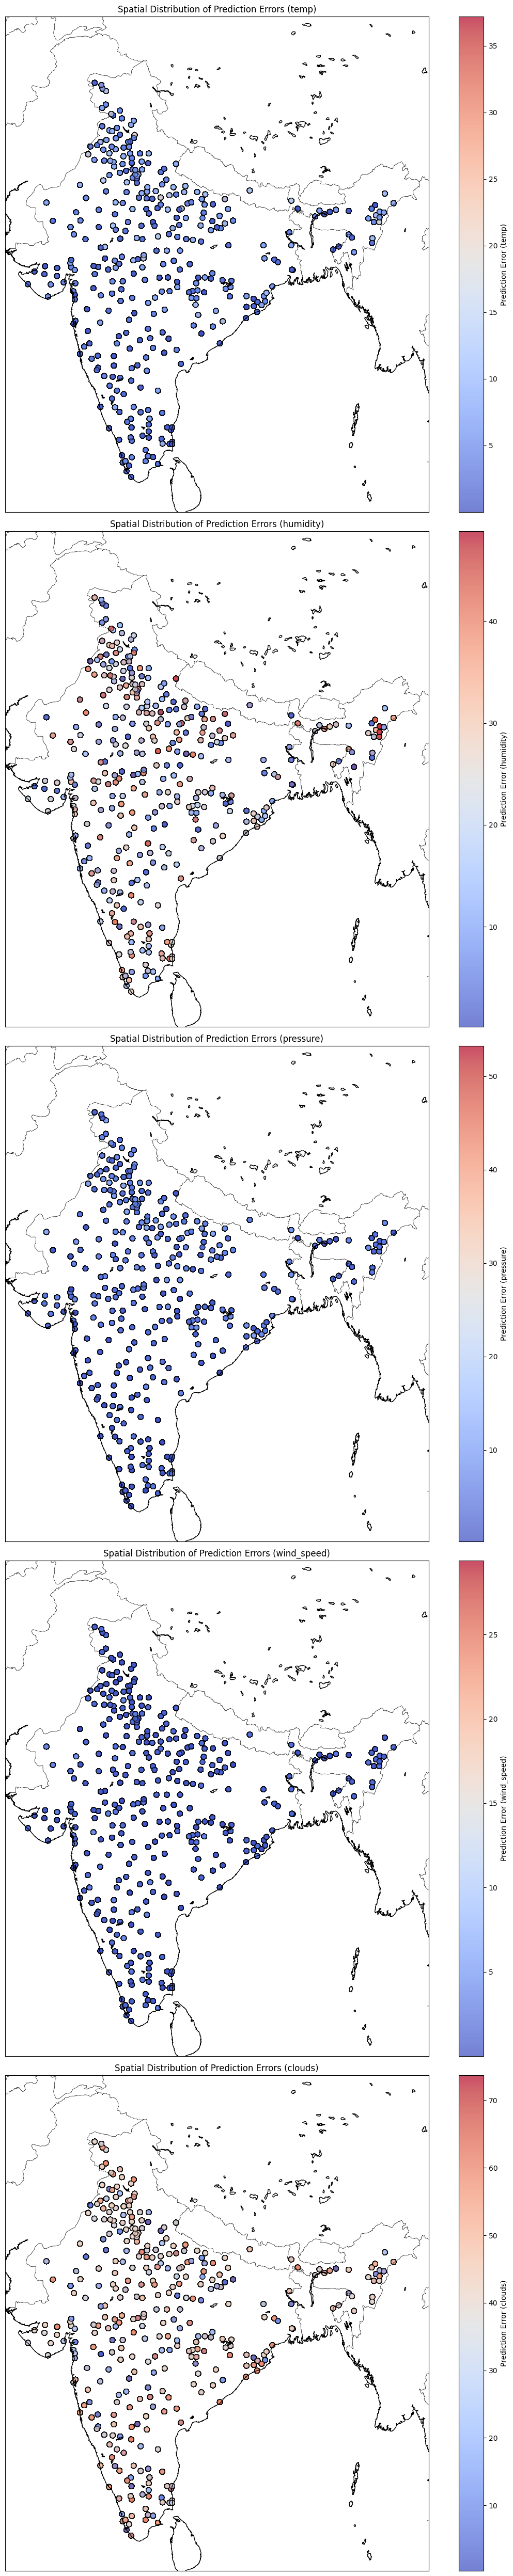

In [ ]:
def visualize_spatial_predictions(model, test_loader, target_cols, target_scaler=None):
    """Create a map visualization of prediction accuracy across India for multiple target variables"""
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    all_preds, all_targets, all_coords = [], [], []

    with torch.no_grad():
        for X_test, y_test, coords_test in test_loader:
            X_test = X_test.float().to(device)
            coords_test = coords_test.float().to(device)

            outputs = model(X_test, coords_test)

            all_preds.extend(outputs.cpu().numpy())
            all_targets.extend(y_test.numpy())
            all_coords.extend(coords_test.cpu().numpy())

    # Convert to arrays
    predictions_np = np.array(all_preds)    # Expected shape: (total_samples, num_target_cols)
    targets_np = np.array(all_targets)      # Expected shape: (total_samples, 1, num_target_cols)
    coords_np = np.array(all_coords)        # Expected shape: (total_samples, 2)

    # Ensure targets_np is (total_samples, num_target_cols) for scaler and subtraction
    if targets_np.ndim == 3 and targets_np.shape[1] == 1:
        targets_np = targets_np.squeeze(axis=1) # Shape becomes (total_samples, num_target_cols)
    
    # At this point, predictions_np and targets_np should both be (total_samples, num_target_cols)

    # Inverse transform if applicable
    if target_scaler:
        actual_predictions = target_scaler.inverse_transform(predictions_np)
        actual_targets = target_scaler.inverse_transform(targets_np)
    else:
        actual_predictions = predictions_np
        actual_targets = targets_np
    
    # Now, actual_predictions and actual_targets are (total_samples, num_target_cols) 
    # and inverse transformed if a scaler was provided.

    # Calculate errors for each target variable
    errors = np.abs(actual_predictions - actual_targets) # errors shape: (total_samples, num_target_cols)

    # Create subplots for each target variable
    num_targets = len(target_cols)
    fig, axes = plt.subplots(num_targets, 1, figsize=(12, 10 * num_targets))
    if num_targets == 1: # Ensure axes is always an array
        axes = [axes]


    for i, target_col in enumerate(target_cols):
        ax = axes[i]
        m = Basemap(projection='merc',
                    llcrnrlat=6, urcrnrlat=38,
                    llcrnrlon=68, urcrnrlon=98,
                    resolution='i', ax=ax)

        m.drawcoastlines()
        m.drawcountries()
        m.drawstates()

        # Convert lat/lon to map coordinates
        x, y = m(coords_np[:, 1], coords_np[:, 0])  # lon, lat

        # Select errors corresponding to the current target and coordinates
        # errors is (total_samples, num_target_cols), so errors[:, i] gives errors for the i-th target.
        current_errors = errors[:, i] 

        # Create scatter plot with error intensity
        scatter = m.scatter(x, y, c=current_errors, s=50, cmap='coolwarm',
                           alpha=0.7, edgecolors='k')

        plt.colorbar(scatter, label=f'Prediction Error ({target_col})', ax=ax)
        ax.set_title(f'Spatial Distribution of Prediction Errors ({target_col})')

    plt.tight_layout()
    return plt

# 5. Evaluate and visualize
plt = visualize_spatial_predictions(
    model, test_loader, target_cols=['temp', 'humidity', 'pressure', 'wind_speed', 'clouds'], target_scaler=target_scaler
)
plt.savefig('spatial_prediction_map.png')
plt.show()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
df.describe()

,id,city_id,latitude,longitude,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,clouds,wind_speed,wind_degree,time_diff
count,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634122.000000,5634121.000000
mean,2921439.738638,1324751.526263,22.886934,78.885807,25.915924,25.856273,25.924032,1008.136932,1008.131553,970.813697,51.776146,41.343107,3.073992,188.279517,1.000000
std,1626527.510138,543146.341512,6.221208,8.939075,7.414541,7.422143,7.416251,6.246186,6.253577,36.974189,24.935778,40.929162,1.899257,103.719002,0.000000
min,103253.000000,735264.000000,-8.591200,0.059500,-12.030000,-12.030000,-12.030000,953.000000,953.000000,727.000000,2.000000,-13.000000,0.000000,0.000000,1.000000
25%,1512951.250000,1260637.000000,19.720000,75.720000,21.360000,21.290000,21.370000,1004.000000,1004.000000,960.000000,30.000000,0.000000,1.650000,92.000000,1.000000
50%,2921481.500000,1269321.000000,23.830000,77.733300,26.300000,26.240000,26.300000,1009.000000,1009.000000,979.000000,51.000000,29.000000,2.700000,207.000000,1.000000
75%,4330042.750000,1274693.000000,27.150000,81.300000,30.520000,30.460000,30.530000,1013.000000,1013.000000,994.000000,73.000000,88.000000,4.130000,277.000000,1.000000
max,5738573.000000,7302854.000000,51.530000,120.671000,50.710000,50.710000,50.710000,1037.000000,1037.000000,1034.000000,102.000000,115.000000,33.410000,360.000000,1.000000


In [ ]:
def calculate_and_print_evaluation_metrics(model, test_loader, target_cols, target_scaler=None):
    """Calculate and print evaluation metrics for model predictions"""
    import numpy as np
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import torch
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()
    
    all_preds, all_targets = [], []
    
    with torch.no_grad():
        for X_test, y_test, coords_test in test_loader:
            X_test = X_test.float().to(device)
            coords_test = coords_test.float().to(device)
            
            outputs = model(X_test, coords_test)
            
            all_preds.extend(outputs.cpu().numpy())
            all_targets.extend(y_test.numpy())
    
    # Convert to arrays
    predictions_np = np.array(all_preds)
    targets_np = np.array(all_targets)
    
    # Ensure targets_np is (total_samples, num_target_cols)
    if targets_np.ndim == 3 and targets_np.shape[1] == 1:
        targets_np = targets_np.squeeze(axis=1)
    
    # Inverse transform if applicable
    if target_scaler:
        actual_predictions = target_scaler.inverse_transform(predictions_np)
        actual_targets = target_scaler.inverse_transform(targets_np)
    else:
        actual_predictions = predictions_np
        actual_targets = targets_np
    
    # Calculate evaluation metrics
    metrics = {}
    for i, target_col in enumerate(target_cols):
        y_true = actual_targets[:, i]
        y_pred = actual_predictions[:, i]
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        metrics[target_col] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    
    # Print evaluation metrics
    print("Evaluation Metrics:")
    for target_col, metric_vals in metrics.items():
        print(f"Metrics for {target_col}:")
        for metric_name, value in metric_vals.items():
            print(f"  {metric_name}: {value:.4f}")
        print()
    
    return metrics

# Usage:
metrics = calculate_and_print_evaluation_metrics(model, test_loader, ['temp', 'humidity', 'pressure', 'wind_speed', 'clouds'], target_scaler=target_scaler)


Evaluation Metrics:
Metrics for temp:
  MAE: 5.7691
  MSE: 55.0703
  RMSE: 7.4209
  R2: -0.0002

Metrics for humidity:
  MAE: 21.6104
  MSE: 621.5486
  RMSE: 24.9309
  R2: 0.0001

Metrics for pressure:
  MAE: 5.1256
  MSE: 39.1362
  RMSE: 6.2559
  R2: -0.0005

Metrics for wind_speed:
  MAE: 1.4947
  MSE: 3.6148
  RMSE: 1.9013
  R2: -0.0005

Metrics for clouds:
  MAE: 37.7940
  MSE: 1674.8445
  RMSE: 40.9249
  R2: 0.0001

